In [0]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [0]:
iris_df=pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/external/Iris_knn.csv')
# store randome number using random.randint from range 0,150 
nrand = []
for i in np.arange(0,10) :
  nrand.append(random.randint(0,150))

iris_df.iloc[nrand]

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
24,4.8,3.4,1.9,0.2,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor
139,6.9,3.1,5.4,2.1,Iris-virginica
17,5.1,3.5,1.4,0.3,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [0]:
#change column name
iris_df.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']


In [0]:
iris_df.SepalLength=pd.to_numeric(iris_df.SepalLength,errors='coerce').fillna(iris_df.SepalLength.median())

In [0]:
iris_df.SepalWidth=pd.to_numeric(iris_df.SepalWidth,errors='coerce').fillna(iris_df.SepalWidth.median())

In [0]:
iris_df.PetalLength=pd.to_numeric(iris_df.PetalLength,errors='coerce').fillna(iris_df.PetalLength.median())

In [0]:
iris_df.PetalWidth=pd.to_numeric(iris_df.PetalWidth,errors='coerce').fillna(iris_df.PetalWidth.median())

In [0]:
iris_df.info()
#showing all column having Float value except class column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [0]:
#first change type of column
iris_df.Class = pd.Categorical(iris_df.Class)

In [0]:
#create seperate column for categorical column
iris_df['class_code']=iris_df.Class.cat.codes

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [0]:
#correlation between sepalLength and class code
#by the way I can find correlation by using pd.corr
iris_df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth,class_code
SepalLength,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLength,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
class_code,0.782561,-0.419446,0.949043,0.956464,1.000000


In [0]:
#But I unable to understant meaning of doing correlation between continuous variable and categorical targe. Even if It 
# is showing correlation with independent variable to class code but here no significant meaning
# correlation formula = s(x*y)/s(x)s(y) ====> multiply both x and y would give wrong result depend on my categorical value

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [0]:
iris_df.var()

SepalLength    0.685694
SepalWidth     0.188004
PetalLength    3.113179
PetalWidth     0.582414
class_code     0.671141
dtype: float64

In [0]:
# here no such column which having variance less than 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

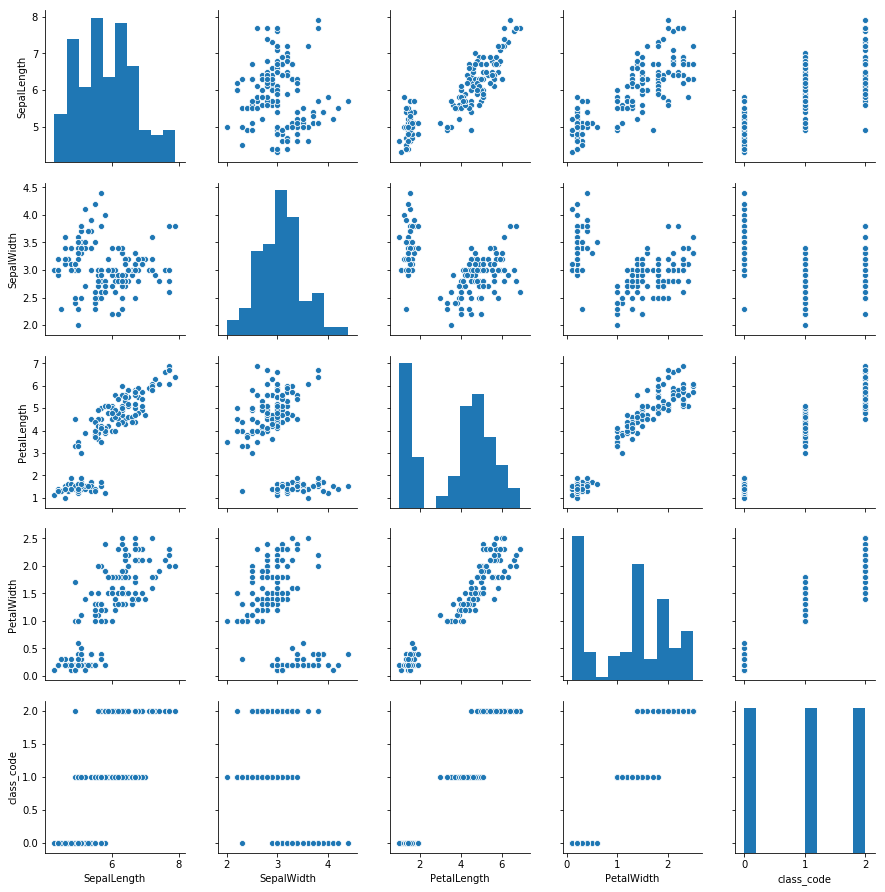

In [0]:
sns.pairplot(iris_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
X=iris_df.iloc[:,0:4]
Y=iris_df.iloc[:,5]

In [0]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
knn = KNeighborsClassifier(n_neighbors =4)
knn.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(X_test)
accuracy_score(Y_test, y_pred)

0.9666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [0]:
error = []
for i in np.arange(1,20) :
  knn2 = KNeighborsClassifier(n_neighbors =i)
  knn2.fit(X_train, Y_train)
  y_pred_k = knn2.predict(X_test)
  error.append(1-accuracy_score(Y_test, y_pred_k))

In [0]:
error

[0.033333333333333326,
 0.06666666666666665,
 0.033333333333333326,
 0.033333333333333326,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.09999999999999998,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.09999999999999998,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.09999999999999998,
 0.06666666666666665]

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Misclassfiacation Error')

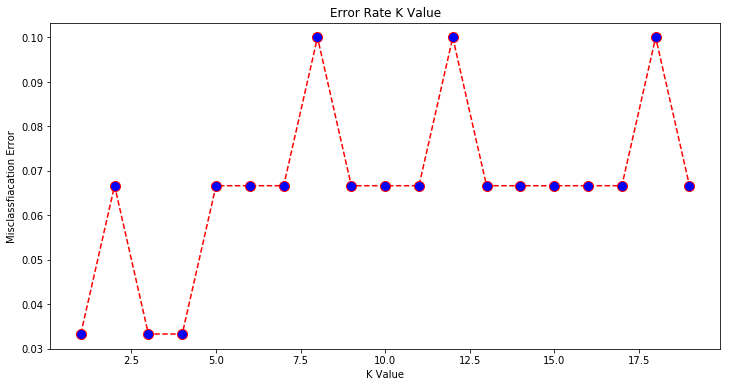

In [0]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Misclassfiacation Error') 

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
x = iris_df.loc[:, features].values
y = iris_df.loc[:,['Class']].values

In [0]:
#Check the dataset
print(y)
print(x)

[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [0]:
iris_df.Class.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

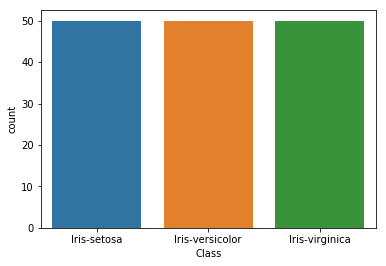

In [0]:
sns.countplot(x='Class',data=iris_df)

In [0]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [0]:
iris_df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth,class_code
SepalLength,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLength,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
class_code,0.782561,-0.419446,0.949043,0.956464,1.000000


In [0]:
#petalLength and PetalWidth has very much correlated (0.962757) to each other 

### Split data in Training and test set in 80:20.

In [0]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

### Question 13 
Do Feature Scaling 

In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 
# Use StandardScaler or similar methods

### Question 14 
Train and Fit NaiveBayes Model

In [0]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(x_train, y_train)

In [0]:
#Predict
y_pred_GNB=clf_GNB.predict(x_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# show Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]


In [0]:
# show accuracy
#from sklearn.metrics import 
accuracy_score(y_test, y_pred_GNB)

0.9333333333333333

In [0]:
#Show precision and Recall metrics

In [0]:
print(classification_report(y_test, y_pred_GNB))  

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

